# STATISTICAL ANALYSIS OF SEA SURFACE TEMPERATURE (SST) DATA
Merissa Lissade

### Importing Necessary Python Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

### Reading in the Data

In [4]:
column_names = ['YR','MO','DY','HR','LAT','LON','ISST','OSST','OERR','SI','ICflag',
                'DS','VS','WDIR','WSPD','SLP','AT','WBT','DPT','CLT','CLL']
db = pd.read_csv('DB_32537.csv', names=column_names)
mb = pd.read_csv('MB_15003.csv', names=column_names)
sh = pd.read_csv('SH_0000989.csv', names=column_names)

## DATA SUMMARIES

### Drifting Buoy
Active: 1991 - 2009\
Number of Readings Taken: 19,707

In [5]:
db.describe()

,YR,MO,DY,HR,LAT,LON,ISST,OSST,OERR,SI,...,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT,CLL
count,19707.000000,19707.000000,19707.000000,19707.000000,19707.000000,19707.000000,19707.000000,19508.000000,19508.000000,0.0,...,0.0,0.0,4.000000,4.000000,0.0,4.000000,0.0,0.0,0.0,0.0
mean,2006.919775,6.115340,15.729639,11.888310,-7.796235,235.692543,27.437474,27.476988,0.185442,NaN,...,NaN,NaN,107.500000,5.650000,NaN,19.900000,NaN,NaN,NaN,NaN
std,3.230373,3.170794,8.795780,6.581414,7.547962,25.157761,1.636655,1.420800,0.078968,NaN,...,NaN,NaN,9.574271,0.754983,NaN,12.220475,NaN,NaN,NaN,NaN
min,1991.000000,1.000000,1.000000,0.000000,-21.230000,0.000000,17.100000,21.710000,0.100000,NaN,...,NaN,NaN,100.000000,5.100000,NaN,1.600000,NaN,NaN,NaN,NaN
25%,2006.000000,4.000000,8.000000,6.070000,-13.295000,213.180000,26.600000,26.720000,0.130000,NaN,...,NaN,NaN,100.000000,5.100000,NaN,19.525000,NaN,NaN,NaN,NaN
50%,2007.000000,6.000000,16.000000,11.920000,-8.360000,240.590000,27.500000,27.550000,0.160000,NaN,...,NaN,NaN,105.000000,5.400000,NaN,25.500000,NaN,NaN,NaN,NaN
75%,2009.000000,9.000000,23.000000,16.870000,-5.010000,258.385000,28.500000,28.530000,0.210000,NaN,...,NaN,NaN,112.500000,5.950000,NaN,25.875000,NaN,NaN,NaN,NaN
max,2009.000000,12.000000,31.000000,23.980000,13.900000,273.640000,43.100000,30.470000,0.590000,NaN,...,NaN,NaN,120.000000,6.700000,NaN,27.000000,NaN,NaN,NaN,NaN


### Moored Buoy
Active: 1999 - 2000\
Number of Readings Taken: 9,966

In [6]:
mb.describe()

,YR,MO,DY,HR,LAT,LON,ISST,OSST,OERR,SI,...,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT,CLL
count,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000,9966.000000,9871.0,...,0.0,0.0,3368.000000,3368.000000,0.0,8529.000000,0.0,8434.000000,0.0,0.0
mean,1999.185029,6.035019,15.564319,11.497491,-5.118387,350.042245,26.388882,26.313165,0.174702,12.0,...,NaN,NaN,149.404097,6.229038,NaN,26.189882,NaN,22.946775,NaN,NaN
std,0.388341,3.517240,8.865026,6.898151,0.087594,0.006502,1.563931,1.532228,0.020137,0.0,...,NaN,NaN,15.435034,1.256222,NaN,1.356645,NaN,1.492601,NaN,NaN
min,1999.000000,1.000000,1.000000,0.000000,-6.030000,349.990000,23.600000,23.590000,0.140000,12.0,...,NaN,NaN,51.000000,0.000000,NaN,21.900000,NaN,18.300000,NaN,NaN
25%,1999.000000,3.000000,8.000000,6.000000,-5.110000,350.040000,25.000000,24.900000,0.170000,12.0,...,NaN,NaN,141.000000,5.500000,NaN,25.000000,NaN,21.800000,NaN,NaN
50%,1999.000000,6.000000,15.000000,11.000000,-5.110000,350.040000,26.500000,26.400000,0.190000,12.0,...,NaN,NaN,149.000000,6.400000,NaN,26.300000,NaN,23.100000,NaN,NaN
75%,1999.000000,9.000000,23.000000,17.000000,-5.110000,350.050000,27.900000,27.720000,0.190000,12.0,...,NaN,NaN,157.000000,7.100000,NaN,27.400000,NaN,24.200000,NaN,NaN
max,2000.000000,12.000000,31.000000,23.000000,-5.000000,350.050000,29.300000,28.930000,0.210000,12.0,...,NaN,NaN,300.000000,9.800000,NaN,33.000000,NaN,29.800000,NaN,NaN


### Ship
Active: 1994 - 1998\
Number of Readings Taken: 10,373

In [7]:
sh.describe()

,YR,MO,DY,HR,LAT,LON,ISST,OSST,OERR,SI,...,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT,CLL
count,10373.000000,10373.000000,10373.000000,10373.000000,10373.000000,10373.000000,10373.000000,10307.000000,10307.000000,10000.000000,...,9408.000000,9407.000000,10373.000000,10365.00000,10370.000000,10347.000000,10332.000000,10335.000000,10370.000000,9481.000000
mean,1996.104791,5.208040,16.260773,11.091873,35.973518,161.541897,17.774443,17.933254,0.292860,1.201200,...,4.216730,2.223876,195.306276,7.85316,1013.279875,17.309259,14.747842,12.551959,4.506172,3.328868
std,1.205268,3.276161,8.794268,6.302485,15.914785,150.382251,6.226344,6.139258,0.128198,1.470012,...,2.305956,0.964858,102.249230,4.16974,8.989863,6.706280,6.323274,7.109134,2.731183,2.428527
min,1994.000000,1.000000,1.000000,0.000000,-31.900000,0.000000,5.200000,6.130000,0.120000,0.000000,...,0.000000,0.000000,10.000000,0.00000,958.600000,-0.500000,-1.200000,-11.300000,0.000000,0.000000
25%,1995.000000,3.000000,8.000000,6.000000,29.000000,17.300000,13.500000,13.500000,0.200000,0.000000,...,2.000000,2.000000,110.000000,4.60000,1008.900000,12.300000,10.000000,7.500000,2.000000,1.000000
50%,1996.000000,4.000000,17.000000,11.000000,41.100000,104.100000,15.700000,15.840000,0.260000,0.000000,...,5.000000,2.000000,200.000000,7.70000,1013.600000,16.000000,13.800000,11.900000,5.000000,3.000000
75%,1997.000000,7.000000,24.000000,16.000000,48.900000,353.200000,22.400000,22.470000,0.370000,3.000000,...,6.000000,3.000000,280.000000,10.30000,1018.700000,22.500000,19.400000,17.600000,7.000000,5.000000
max,1998.000000,12.000000,31.000000,23.000000,60.300000,359.900000,33.000000,31.740000,1.180000,3.000000,...,8.000000,6.000000,362.000000,27.30000,1036.200000,35.000000,30.800000,29.400000,9.000000,9.000000


## POSITIONINGS

In [11]:
def plot_positions(df, name, add_cb):
    plt.figure(figsize=(12,12))

    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.stock_img()
    ax.coastlines()
    ax.gridlines()

    plt.scatter(df.LON, df.LAT, c=df.YR, cmap='rainbow', s=3, alpha=0.5)
    plt.title(name)
    if add_cb == True:
        plt.colorbar(orientation="horizontal")
    plt.savefig('{}_position.png'.format(name))

### Drifting Buoy
The drifting buoy shows that it mostly drifted around the Pacific Ocean

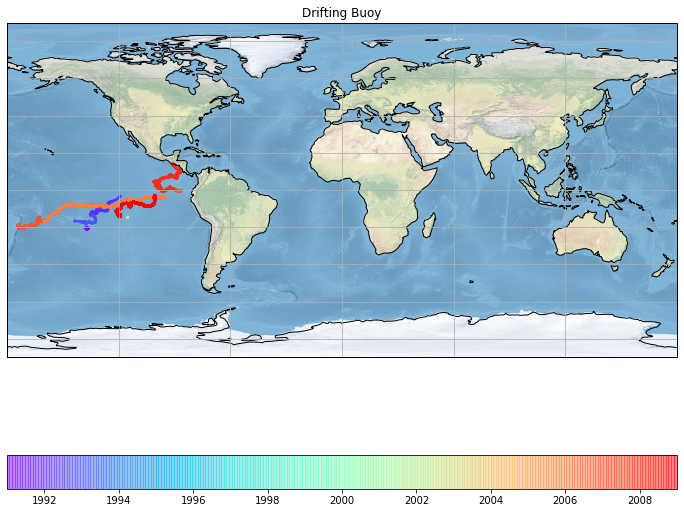

In [12]:
plot_positions(db, 'Drifting Buoy', True)

### Moored Buoy
The moored buoy was in the Atlantic Ocean just off the coast of Africa near Liberia

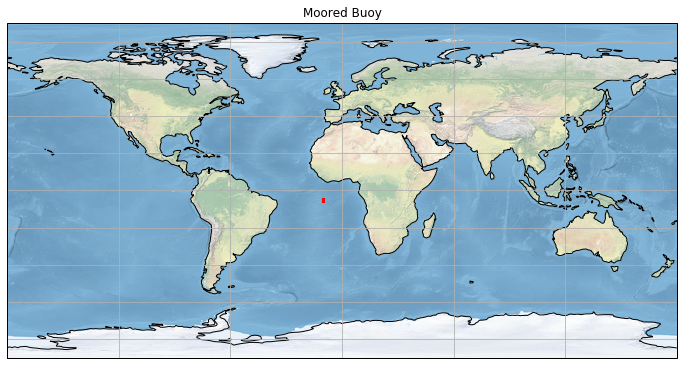

In [13]:
plot_positions(mb, 'Moored Buoy', False)

### Ship
The ship started somewhere near Western Europe then traveled across the Atlantic Ocean to the east coast of North America. The ship then returned to Western Europe on a similar path that it came. It traveled through the Mediterranean Sea then the Indian Ocean towards Australia. From Australia, the ship traveled through the Pacific Ocean going to Japan. After Japan, it makes its way back through the Pacific Ocean, Indian Ocean, and Mediterranean Sea to end up back near Western Europe.

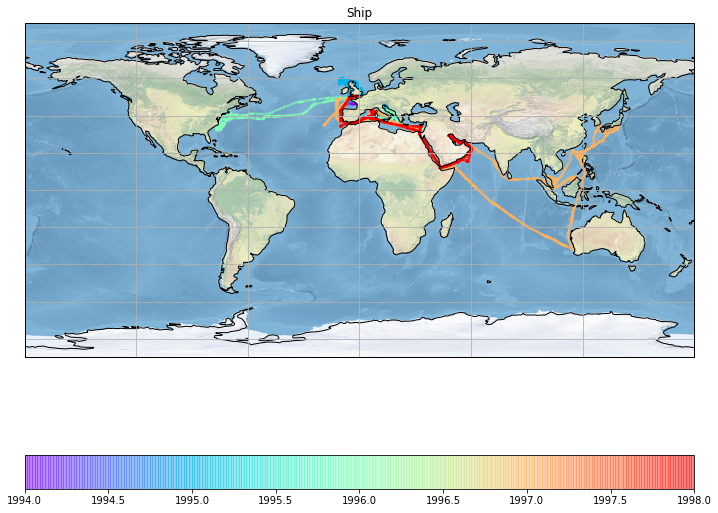

In [14]:
plot_positions(sh, 'Ship', True)

## LINEARITY BETWEEN ISST AND OSST
I wanted to see if the ISST and OSST are positively linear. If they were not this would show us right away that there is possibly a huge difference in measurements between ISST and OSST. If they were this then gives us some confirmation of the accuracy of the readings for sea surface temperature. 

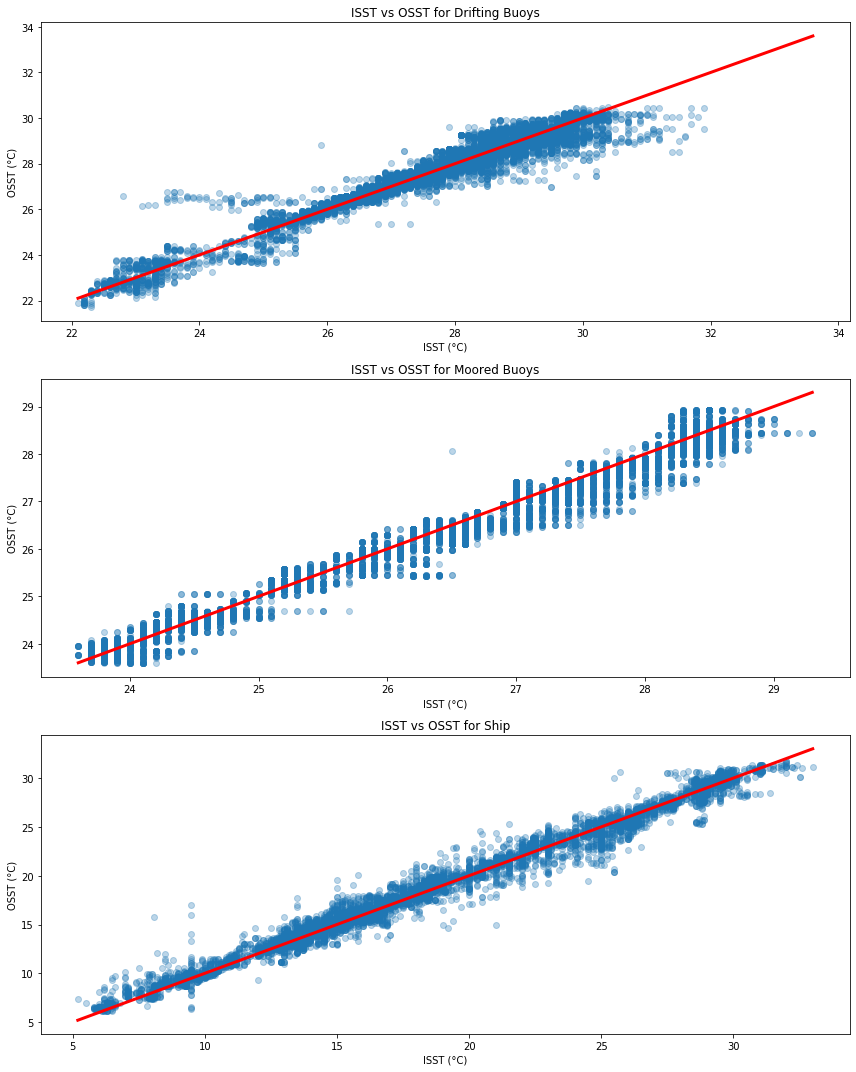

In [14]:
plt.figure(figsize=(12,15))
for df, name, sp in zip([db, mb, sh],['Drifting Buoys','Moored Buoys','Ship'], range(1,4)):
    z = np.linspace(df.ISST[df['ICflag']==1].min(), df.ISST[df['ICflag']==1].max(), 100)
    plt.subplot(3,1,sp)
    plt.scatter(x=df.ISST[df['ICflag']==1], y=df.OSST[df['ICflag']==1], alpha=0.3)
    plt.plot(z, z, '-r', linewidth=3)
    plt.xlabel('ISST (°C)')
    plt.ylabel('OSST (°C)')
    plt.title('ISST vs OSST for {}'.format(name))
    plt.savefig('{}_diff.png'.format(name))
plt.tight_layout();

From these scatter plots, it can be said that the measurements are linearly related. The difference does not seem to be too great but does this mean we can also assume that the difference in measurements is small enough to be insignificant?

## HYPOTHESIS TESTING
To determine if my assumption is true, I decided to perform a hypothesis test to see if the difference in measurements between ISST and OSST is significant.

$$H_0: \mu_{ISST} = \mu_{OSST}$$  $$H_1:\mu_{ISST} \neq \mu_{OSST}$$

#### Drifting Buoy

In [11]:
db_ht = db[['ISST','OSST']].dropna()
stats.ttest_rel(db_ht.ISST,db_ht.OSST)

Ttest_relResult(statistic=-5.341950234638652, pvalue=9.298263419880141e-08)

#### Moored Buoy

In [12]:
mb_ht = mb[['ISST','OSST']].dropna()
stats.ttest_rel(mb_ht.ISST,mb_ht.OSST)

Ttest_relResult(statistic=30.79403739934175, pvalue=5.433436871480963e-199)

#### Ship

In [13]:
sh_ht = sh[['ISST','OSST']].dropna()
stats.ttest_rel(sh_ht.ISST,sh_ht.OSST)

Ttest_relResult(statistic=-18.30353308020165, pvalue=1.132250987607157e-73)

The p-values for each of my tests are extremely small. Small p-values are usually associated with large t-statistics as well. Since the p-values are small, the null hypothesis of equal averages is rejected; meaning the difference in measurements is not small enough to be insignificant.